# An RBC model

In this notebook we show how to solve a simple RBC model in sequence space.

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Neoclassical growth model


Let's consider a standard neoclassical growth model with the following equilibrium conditions

$$
\textbf{H}_t(\textbf{Y}, \hat{a}) \equiv 
\begin{pmatrix}
\gamma \hat{c}_t -\gamma  \hat{c}_{t+1} + (1 - \beta(1-\delta))  \hat{mpk}_{t+1} \\
-\hat{k}_{t} + \delta \hat{\iota}_{t-1} + (1-\delta)\hat{k}_t \\
			- \hat{y}_t + \hat{z}_t + \alpha \hat{k}_{t-1} \\
			-\hat{mpk}_{t+1} +  \hat{z}_{t+1} + (\alpha-1) \hat{k}_t  \\
			-\hat{y}_t + s_c \hat{c}_t +(1-s_c) \hat{\iota}_t \\
\end{pmatrix}
= \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ \end{pmatrix},
\qquad t = 0, 1, \dots 
\tag{1}
$$
where $\textbf{Y} = \{\hat{c}, \hat{\iota}, \hat{k}, \hat{y}, \hat{mpk}\}$ denotes the set of endogenous variables, and $\hat{z}$ is the only exogenous variable. 

#### The neoclassical DAG
The 7 equations of the RBC model can be organized as three blocks which form a DAG in two unknowns $\mathbf{U} = \{\mathbf{\hat{k}}, \mathbf{\hat{n}}\}$ and two targets, the Euler equation and goods market clearing. 

1. Firm block:
    - $\hat{y}_t = \hat{z}_t + \alpha \hat{k}_{t-1} $
    - $\hat{mpk}_{t+1} =  \hat{z}_{t+1} + (\alpha-1) \hat{k}_t  $
2. Household block:
   - $\hat{k}_{t} =\delta \hat{\iota}_{t-1} + (1-\delta)\hat{k}_t $
   - $- \gamma \hat{c}_t = -\gamma  \hat{c}_{t+1} + (1 - \beta(1-\delta))  \hat{mpk}_{t+1} $
3. Market clearing block:
   - $0=s_c\hat{c}_t + (1-s_c)\hat{\iota}_t -\hat{y}_t$

The DAG captures the following logic: given $\mathbf{U} = \{\mathbf{\hat{k}}\}$ we can solve for for $\mathbf{\hat{y}}$ and $\mathbf{\hat{mpk}}$ in the firm block. Then given $\mathbf{U}$ and $\mathbf{\hat{mpk}}$, we solve for $\mathbf{\hat{c}}$ and $\mathbf{\hat{\iota}}$ in the household block. Finally, we verify that our sequences are consistent with market clearing in the market clearing block.

The image below shows a visualization of the DAG.

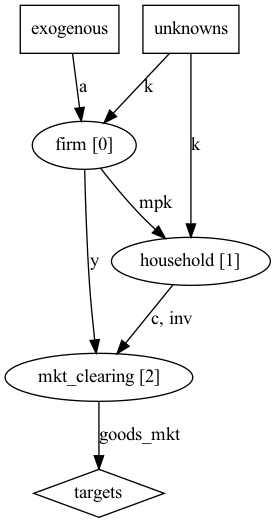

In [18]:
from IPython.display import Image

Image(filename='dag/neoclassical.png') 

We write the reduced system as
$$
\textbf{H}_t(\textbf{U}, \hat{a}) = 0
$$

We next set up the matrices as we did in class. First define the parameters.

In [19]:
gamma = 1
alpha = 0.33
beta = 0.95
delta = 0.025
sc = 0.8
T = 100

Next we set up the matrices in the market clearing block, which we use to construct $\partial \mathbf{H}/ \partial \mathbf{Y}$.

In [ ]:
# define sparse identity, above-diagonal sparse matrix, below-diagonal sparse matrix, and zero matrix
I = sp.sparse.eye(T)
Ip1 = sp.sparse.diags([np.ones(T-1)], [1], (T, T))
Im1 = sp.sparse.diags([np.ones(T-1)], [-1], (T, T))
Z = sp.sparse.csr_matrix((T, T))

In [20]:
# market clearing block: goods market clearing


# market clearing block: Euler equation


# combine matrix blocks in a single sparse matrix with the following structure:


Next we construct $\partial \mathbf{Y} / \partial \mathbf{U}$ and $\partial \mathbf{Y} / \partial \mathbf{Z}$ using the blocks. Start with the firm block.

In [21]:
# firm block matrices: output


# firm block matrices: capital demand. Note return is computed for the next period


# combine firm matrices in the following format:



# combine firm matrices in the following format:



Then move on to the household block.

In [22]:
# household block matrix: Euler


# household block matrix: capital accumulation equation

# combine household matrices in the following format:


# combine household matrices in the following format:



Now stack the household block on top of the firm block to get $\partial \mathbf{Y} / \partial \mathbf{U}$ and $\partial \mathbf{Y} / \partial \mathbf{Z}$.

In [23]:
# stack dYHdU on top of dYFdU to get dYdU


# stack dYHdZ on top of dYFdZ to get dYdZ


We have everything now to compute the solution.

In [24]:
# compute dHdU using the chain rule dHdU = dHdY @ dYdU (@ is the python matrix multiplication operator)


# compute dHdZ using the chain rule dHdZ = dHdY @ dYdZ (@ is the python matrix multiplication operator)




# compute the Jacobian of the model
# dUdZ = - sp.sparse.linalg.spsolve(dHdU, dHdZ)
# dYdZ = dYdU @ dUdZ + dYdZ

# dXdZ = sp.sparse.bmat([[dUdZ],
#                       [dYdZ]])

# assert dUdZ.shape == (T, T)
# assert dYdZ.shape == (4*T, T)
# assert dXdZ.shape == (5*T, T)

Plot IRF for an AR(1) TFP shock with persistence rho

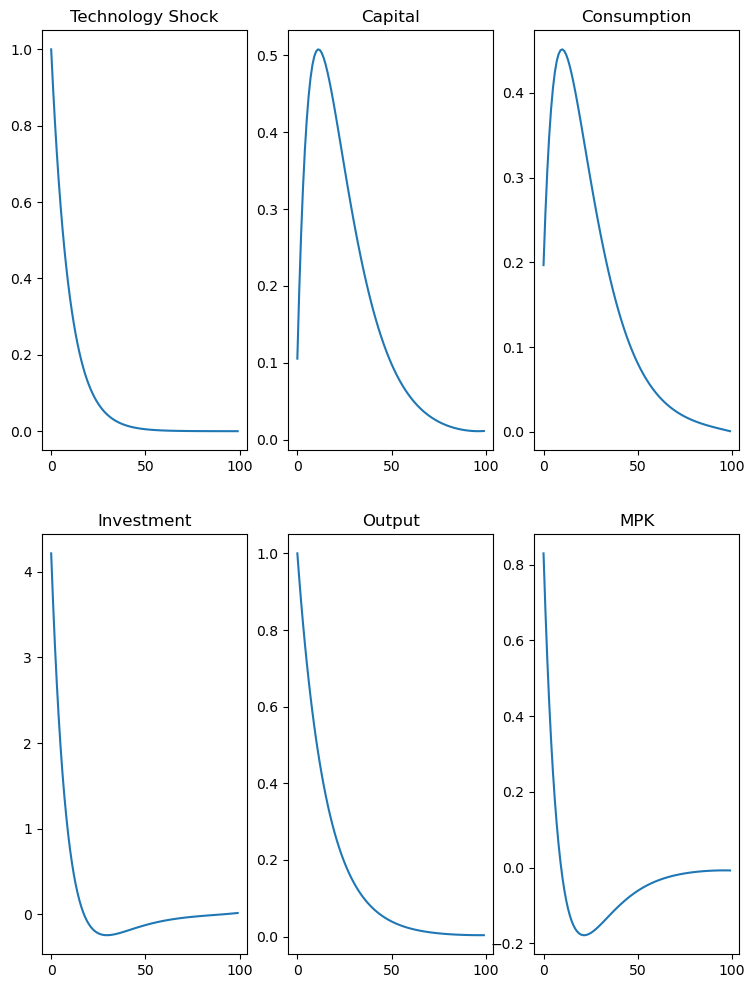

In [25]:
# # plot IRFs to TFP shock with persistence rho
# rho = 0.9
# z = np.zeros((T, 1))
# z[0] = 1
# for t in range(1, T):
#     z[t] = rho * z[t-1]

# # compute impulse response functions
# X = dXdZ @ z

# # unpack X into its components k,n,c,inv,y,wp,rk
# k = X[0:T]
# c = X[T:2*T]
# inv = X[2*T:3*T]
# y = X[3*T:4*T]
# mpk = X[4*T:5*T]
    
# # plot impulse response functions
# fig, ax = plt.subplots(2, 3, figsize=(9, 12))
# ax[0, 0].plot(z, label='a')
# ax[0, 0].set_title('Technology Shock')
# ax[0, 1].plot(k, label='k')
# ax[0, 1].set_title('Capital')
# ax[0, 2].plot(c, label='c')
# ax[0, 2].set_title('Consumption')
# ax[1, 0].plot(inv, label='inv')
# ax[1, 0].set_title('Investment')
# ax[1, 1].plot(y, label='y')
# ax[1, 1].set_title('Output')
# ax[1, 2].plot(mpk, label='rk')
# ax[1, 2].set_title('MPK')
# plt.savefig('neoclassicalIRFs.png')

